<a href="https://colab.research.google.com/github/LucianPopaLVP/Deep-Learning-Project--Dog-Vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multi-class Dog Breed Classification

This notebook buils an end-to-end multi-class image classifier using Tensorflow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data used is from Kaggle's dog bread identification competition: https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evaluation

Multi-Class Log Loss: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

## 4. Features

Info about data:
* Dealing with images (unstructured data) so is probably best to use deep learning/transfer learning;
* There are 120 breeds of dogs (this means there are 120 different classes);
* There are ~ 10,000 + images in the training set(these images have labels) and ~ 10,000 images in the test set(no labels);

## Get my space ready

* Import TF 2.X ✅
* Import TF Hub ✅
* Make sure I am using a GPU ✅

In [3]:
# Import necessary tools
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

# Import TensorFlow and TensorFlow Hub into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available!")

Mounted at /content/drive
TF version: 2.7.0
TF Hub version: 0.12.0
GPU available (YESSS!!!!!!!)


## Acces the data and getting it ready ( turning into tensors)

* With all ML lerning models, data has to be in numerical format. 

In [4]:
# Acces the data and checking the labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     4ec829615f7cc33a25c62e8f111db50d  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [5]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


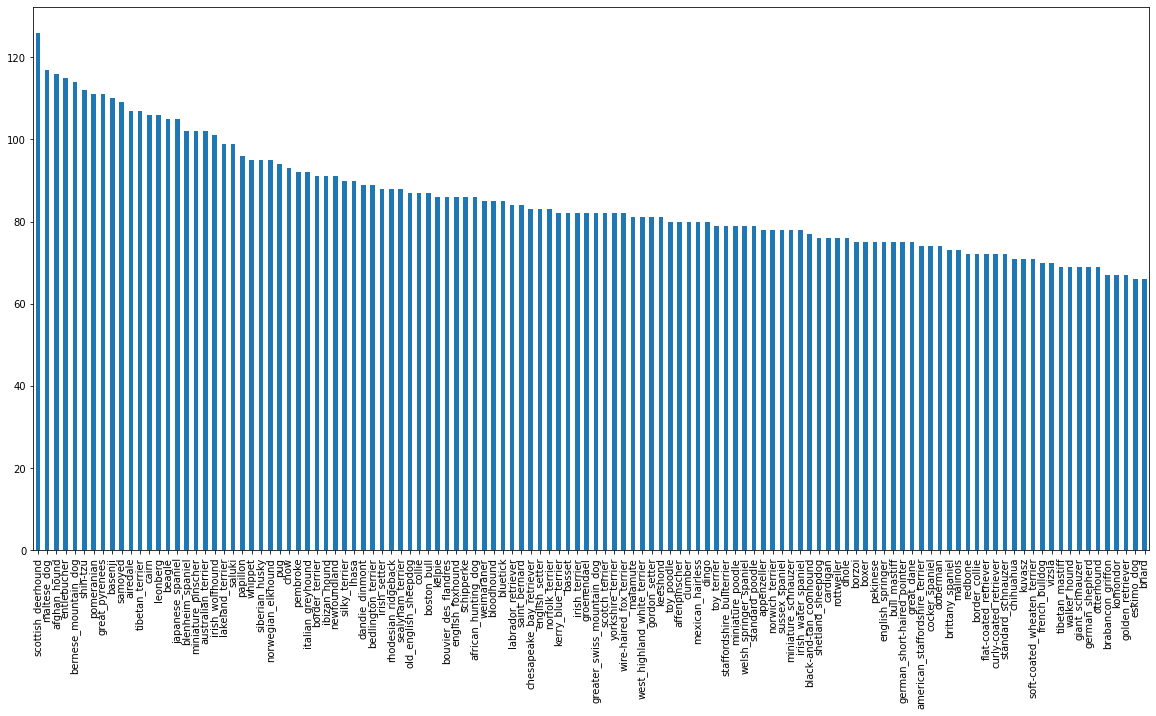

In [6]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [7]:
labels_csv["breed"].value_counts().median()

82.0

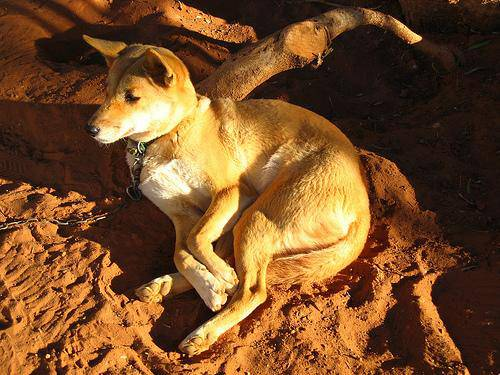

In [8]:
# View an image 
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Get a list of all of the images file pathnames.

In [31]:
# Create pathnames from image ID's
filenames = ["/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive

In [32]:
# Check if number of filenames matches the number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/")) == len(filenames):
  print("They are matching! Proceed!")
else:
  print("They don't match! Check the target directory.")

They are matching! Proceed!


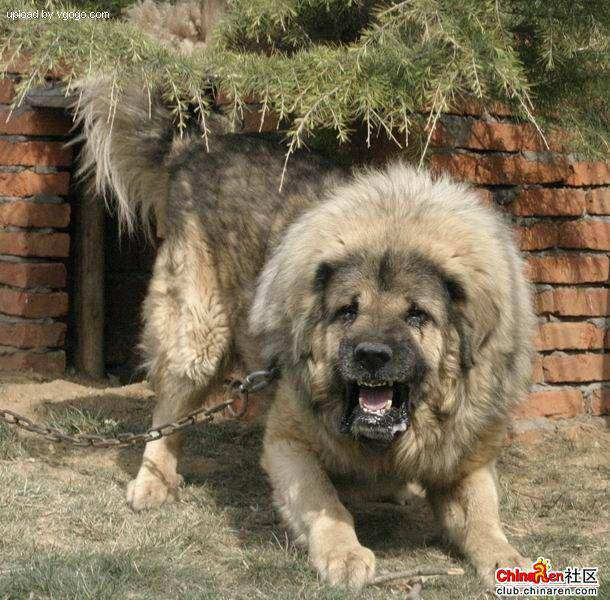

In [33]:
# Check
Image(filenames[9000])

In [34]:
labels_csv["breed"][9000]

'tibetan_mastiff'

# Prepare the labels

In [35]:
import numpy as np
labels = labels_csv["breed"] # or you can directly use `labels = labels_csv["breed"].to_numpy()`
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [36]:
len(labels)

10222

In [37]:
# Check if number of labels matches the number of filenames (to figure out if I have missing values)
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("No match! Check data directories.")

Number of labels matches number of filenames!


In [38]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [39]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [40]:
from numpy.ma.extras import unique
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [41]:
len(boolean_labels)

10222

In [42]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in bolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [43]:
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive

### Creating my own validation set

Since the dataset from Kaggle doesn't include a validation set, can create one to use.

In [44]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [45]:
len(filenames)

10222

#### Start off experimenting with ~ 1000 images and increase it as need it

In [46]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max: 10000, step:1000}

In [47]:
# Split the data into train and validation sets
from sklearn.model_selection import train_test_split

# Split into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [48]:
# Quick look at the training data
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, Fal

## Preprocessing Images ( turning images into Tensors)

To preprocess the images into Tensors gonna write a function which does a few things:
1. Take an image filepath as input;
2. Use TensorFlow to read the file and save it to a variable `image`;
3. Turn the `image` (jpg) into Tensors;
4. Resize the `image` to be a shape of (224, 224);
5. Return the modified `image`.




In [49]:
# Importing example
# Convert image to a NumPy
from matplotlib.pyplot import imread
image = imread(filenames[41])
image.shape
tf.constant(image) # turn image into tensor

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 63,  52,  24],
        [ 62,  51,  23],
        [ 60,  48,  22],
        ...,
        [ 60,  41,  26],
        [ 62,  43,  28],
        [ 63,  44,  29]],

       [[ 64,  53,  25],
        [ 63,  52,  24],
        [ 61,  49,  23],
        ...,
        [ 61,  42,  27],
        [ 62,  43,  28],
        [ 64,  45,  30]],

       [[ 65,  54,  26],
        [ 64,  53,  25],
        [ 62,  50,  24],
        ...,
        [ 62,  43,  28],
        [ 63,  44,  29],
        [ 64,  45,  30]],

       ...,

       [[ 13,   6,   0],
        [ 18,  11,   1],
        [ 26,  17,  10],
        ...,
        [193, 166,  79],
        [197, 170,  83],
        [199, 172,  85]],

       [[ 21,  14,   4],
        [ 21,  14,   4],
        [ 22,  13,   6],
        ...,
        [196, 168,  84],
        [201, 173,  89],
        [204, 176,  92]],

       [[ 25,  18,   8],
        [ 20,  13,   3],
        [ 18,   9,   2],
        ...,
        [201, 172,  9

# Make a function to preprocess images

In [53]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns it into a tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical Tensor  with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  

In [56]:
tensor = tf.io.read_file(filenames[42])

In [55]:
tf.image.decode_jpeg(tensor, channels=3)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 88, 138,  87],
        [ 75, 125,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  84],
        [ 76, 134,  86],
        [ 75, 133,  85]],

       [[ 71, 120,  73],
        [ 65, 115,  66],
        [ 62, 112,  63],
        ...,
        [ 73, 131,  83],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 54, 105,  64],
        [ 56, 107,  66],
        [ 62, 113,  72],
        ...,
        [ 70, 127,  82],
        [ 71, 128,  83],
        [ 72, 129,  84]],

       ...,

       [[  2,  11,  10],
        [  4,  13,  10],
        [  6,  15,  12],
        ...,
        [119, 112,  66],
        [125, 119,  71],
        [121, 115,  67]],

       [[  0,   3,   7],
        [  0,   7,   9],
        [  2,   8,   4],
        ...,
        [104,  97,  51],
        [111, 104,  58],
        [109, 102,  56]],

       [[ 16,  18,  30],
        [ 14,  19,  23],
        [ 15,  20,  13],
        ...,
        [ 99,  92,  4